In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

In [2]:
PATH_TO_DATA = '../data/raw/data.csv'

In [3]:
df = pd.read_csv(PATH_TO_DATA)

In [4]:
df.head()

,V1,V2,V3,V4,Grupo
0,5.1,3.5,1.4,0.2,G1
1,4.9,3.0,1.4,0.2,G1
2,4.7,3.2,1.3,0.2,G1
3,4.6,3.1,1.5,0.2,G1
4,5.0,3.6,1.4,0.2,G1


## Atributos numéricos

Quantidade, média, desvio padrão, mínimo, máximo e quartis das variáveis numéricas. 

In [5]:
df.describe(include=[np.number])

,V1,V2,V3,V4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Atributos categóricos

Quantidade, número de valores distintos e frequência dos valores.

In [6]:
df.describe(include=[np.object])

,Grupo
count,150
unique,3
top,G2
freq,50


# Quantidade de amostras por grupo

Quantas amostras temos por grupo?

In [7]:
df.groupby('Grupo').count()

,V1,V2,V3,V4
Grupo,,,,
G1,50,50,50,50
G2,50,50,50,50
G3,50,50,50,50


Comentários: 

- Há o mesmo número de amostras (50) em cada grupo, para um total de 150 amostras.

- O número de amostras é relativamente pequeno. A confiabilidade dos resultados é maior se houver mais dados à disposição.

# Distribuição das variáveis por grupo

Qual a distribuição de cada variável quando separamos por grupo?

O boxplot mostra algumas estatísticas sobre uma amostra. Dados como:

- a mediana (linha vermelha horizontal)
- limites do primeiro, segundo e terceiro quartis (outras linhas horizontais)
- outliers (marcados com um símbolo '+')

In [8]:
v11,v12,v13 = df.groupby('Grupo')['V1']

In [9]:
v11_values = v11[1].values.reshape(-1,1)
v12_values = v12[1].values.reshape(-1,1)
v13_values = v13[1].values.reshape(-1,1)

data_g1 = np.hstack([v11_values,v12_values,v13_values])

data_g1.shape

(50, 3)

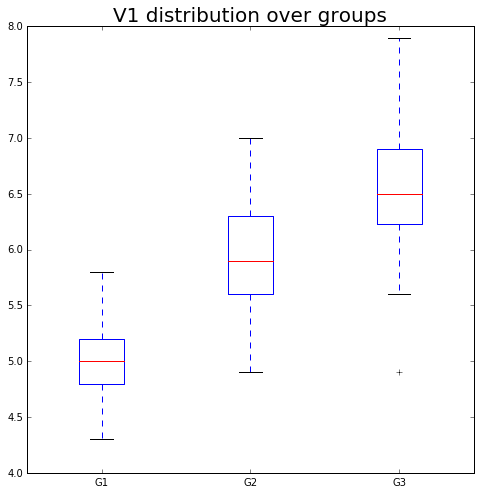

In [10]:
plt.figure()
plt.gca().set_title('V1 distribution over groups',fontsize=20)
plt.gcf().set_size_inches(8,8)
plt.boxplot(data_g1,labels=['G1','G2','G3'])
plt.show()

Comentários: 

- Os grupos apresentam variância parecida, sendo a variância do grupo G3 (para a variável V1) um pouco maior.

- Há um valor de V1 que é um outlier no grupo G3.

- Valores para V1 são geralmente maiores em G3 do que em G2 que, por sua vez, tem em geral valores maiores do que os valores em G1.

In [11]:
# vamos extrair isso para uma função para não ter que 
# repetir esse código para cada variável
def plot_variable_values_for_groups(variable_name,source_dataframe):
    
    groups = source_dataframe.groupby('Grupo')[variable_name]
        
    values = [g[1].values.reshape(-1,1) for g in groups]
    group_names = [g[0] for g in groups]
        
    data_g1 = np.hstack(values)
    
    plt.figure()
    ax = plt.gca()
    ax.set_title('{} distribution over groups'.format(variable_name),fontsize=20)
    
    # more space around the plots
    ax.margins(y=0.05)

    plt.gcf().set_size_inches(8,8)
    plt.boxplot(data_g1,labels=group_names)
    plt.show()

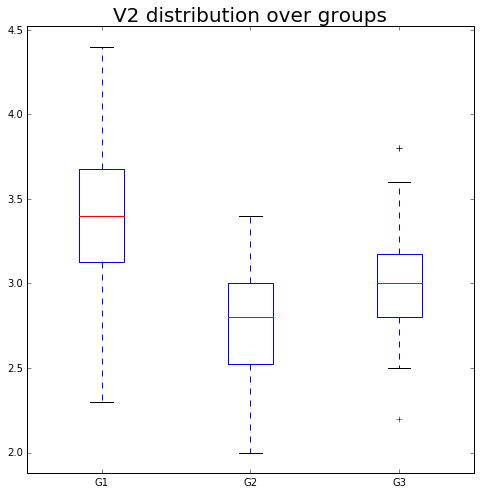

In [12]:
# distribuição da variável V2 em cada grupo
plot_variable_values_for_groups('V2',df)

Comentários: 

- O grupo G1 parece ter maior variância que os outros.

- Há alguns outliers para V2 no grupo G3.

- Valores para V2 são geralmente maiores em G1 do que em G3 que, por sua vez, tem em geral valores maiores do que os valores em G2.

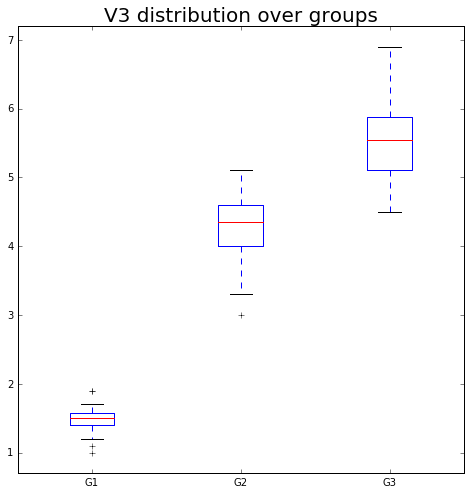

In [13]:
# distribuição da variável V3 em cada grupo
plot_variable_values_for_groups('V3',df)

Comentários: 

- O grupo G1 parece ter menor variância que os outros, mas tem alguns outliers.

- Valores para V3 são geralmente maiores em G1 do que em G2. Os valores de V3 em G1 são consistentemente mais baixos do que os dos outros dois grupos.

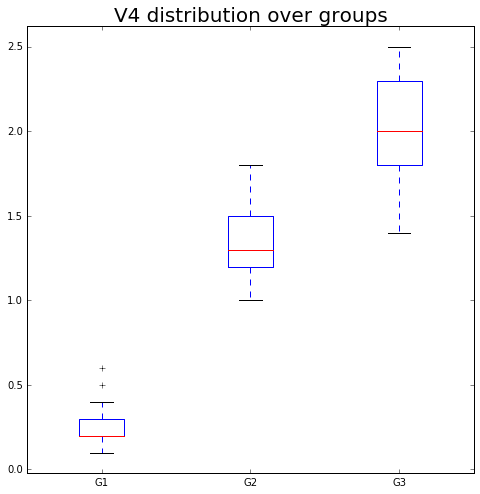

In [14]:
# distribuição da variável V4 em cada grupo
plot_variable_values_for_groups('V4',df)

Comentários:

- Novamente, o grupo G1 parece ter menor variância que os outros, mas tem alguns outliers.

- Novamente, valores para V4 são geralmente maiores em G1 do que em G2. Os valores de V4 em G1 são consistentemente mais baixos do que os dos outros dois grupos.

# Correlação entre as variáveis livres

Variáveis muito correlacionadas tem menor poder preditivo e podem ajudar na etapa de seleção de features. Além disso, é útil para visualização.

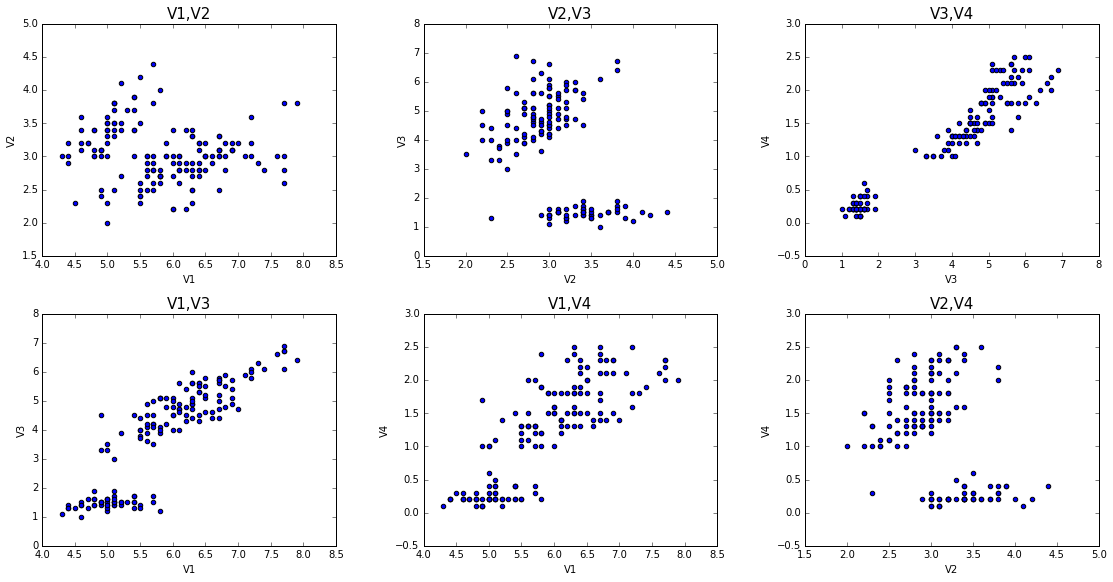

In [15]:
f, axes = plt.subplots(2, 3)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

df.plot.scatter(x='V1',y='V2',ax=axes[0,0])
axes[0,0].set_title('V1,V2',fontsize=15)

df.plot.scatter(x='V2',y='V3',ax=axes[0,1])
axes[0,1].set_title('V2,V3',fontsize=15)

df.plot.scatter(x='V3',y='V4',ax=axes[0,2])
axes[0,2].set_title('V3,V4',fontsize=15)

df.plot.scatter(x='V1',y='V3',ax=axes[1,0])
axes[1,0].set_title('V1,V3',fontsize=15)

df.plot.scatter(x='V1',y='V4',ax=axes[1,1])
axes[1,1].set_title('V1,V4',fontsize=15)

df.plot.scatter(x='V2',y='V4',ax=axes[1,2])
axes[1,2].set_title('V2,V4',fontsize=15)

plt.gcf().set_size_inches(16,8)
plt.show()

Comentários:

- Parece que as variáveis livres mais correlacionadas são as variáveis (V3,V4), (V1,V3) e (V1,V4).

- Vamos confirmar isso usando um coeficiente de correlação, por exemplo o coeficiente de Pearson.

 - Coeficientes de correlação variam entre -1 (correlação negativa) e 1 (correlação positiva), sendo zero se as variáveis não estiverem correlacionadas.


In [16]:
pairs = [
    ("V1","V2"),
    ("V2","V3"),
    ("V3","V4"),
    ("V1","V3"),
    ("V1","V4"),
    ("V2","V4")
]

for (var1,var2) in pairs:
    corr_coef = stats.pearsonr(df[var1].values, df[var2].values)[0]
    print("Pearson Corr entre {} e {}: {}".format(var1,var2,corr_coef))

Pearson Corr entre V1 e V2: -0.10936924995064935
Pearson Corr entre V2 e V3: -0.42051609640115445
Pearson Corr entre V3 e V4: 0.9627570970509662
Pearson Corr entre V1 e V3: 0.8717541573048712
Pearson Corr entre V1 e V4: 0.8179536333691633
Pearson Corr entre V2 e V4: -0.3565440896138059


Comentários:

- Os pares de variáveis (V3,V4), (V1,V3) e (V1,V4) tem, realmente, as maiores correlações de acordo com o coeficiente de Pearson, com coeficientes de 0.96, 0.87 e 0.81, respectivamente.